# PCA (주성분분석)

3d 에서 2d로 차원감소

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

# matplotlib setting
%matplotlib inline

In [2]:
mean = [20, 20, 20]
cov = [
    [7, 2, 2],
    [2, 6, 2],
    [2, 2, 8]
]

original_vectors = np.random.multivariate_normal(mean, cov, 1000)

In [3]:
# recenter vectors
mean_x = np.mean(original_vectors, axis=0)
vectors = original_vectors - mean_x

mean_x = np.mean(vectors, axis=0)
print("mean(almost zero):\n", mean_x)

cov_x = np.cov(np.transpose(vectors))
print("covariance:\n", cov_x)

eigen_values, eigen_vectors = np.linalg.eig(cov_x)
print("eigen values:\n", eigen_values)
print("eigen vectors:\n", eigen_vectors)

print("max eigen value (argmax):\n", np.argmax(eigen_values))
print("max eigen vector (argmax):\n", eigen_vectors[np.argmax(eigen_values)])

mean(almost zero):
 [9.22106835e-15 5.99875705e-15 2.72883938e-14]
covariance:
 [[6.72600356 1.88791458 1.94610026]
 [1.88791458 6.02788238 1.61640959]
 [1.94610026 1.61640959 7.533286  ]]
eigen values:
 [10.4735553   4.45702686  5.35658979]
eigen vectors:
 [[-0.58285366 -0.6403929  -0.50017851]
 [-0.4846577   0.7680459  -0.41858382]
 [-0.65221816  0.00155775  0.75802972]]
max eigen value (argmax):
 0
max eigen vector (argmax):
 [-0.58285366 -0.6403929  -0.50017851]


In [4]:
transformed_vectors = np.matmul(vectors, np.transpose(eigen_vectors))

Text(0.5,1,'transformed random vectors')

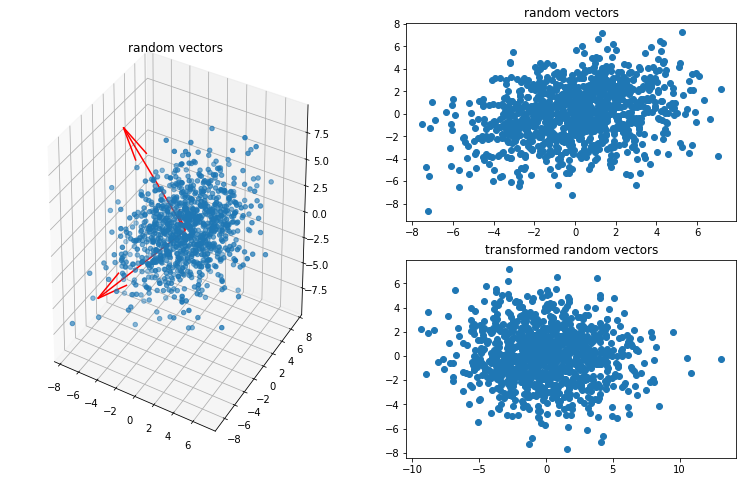

In [5]:
fig = plt.figure(figsize=(13, 8))

plot1 = fig.add_subplot(121, projection='3d')
plot2 = fig.add_subplot(222)
plot3 = fig.add_subplot(224)

plot1.scatter(
    vectors[:,0],
    vectors[:,1],
    vectors[:,2])
plot1.set_title("random vectors")

for vector in eigen_vectors:
    plot1.quiver(0, 0, 0, vector[0] * 10, vector[1] * 10, vector[2] * 10, color='r')

plot2.scatter(
    vectors[:,0],
    vectors[:,1])
plot2.set_title("random vectors")

plot3.scatter(
    transformed_vectors[:,0],
    transformed_vectors[:,2])
plot3.set_title("transformed random vectors")